# Scarp profile analysis

Due to the issues with the Excel scarp profile analysis notebook, I'm providing this jupyter notebook to analyze fault-scarp offsets and displacements.
The notebook is organized in a series of cells, below. To run a cell, you can either press Shift+Return or click the 'Run' button above.

## Step 1: Load the scarp data:

In [86]:
# From QGIS, trace a scarp profile. Click the 'Table' tab and then click 'copy to clipboard'. Then paste the contents below, following the example.
# NOTE THAT IT IS VERY IMPORTANT TO ENCLOSE THE PASTED DATA IN TRIPLE QUOTES ('''PASTED DATA''') AS IS DONE BELOW
scarp_data = '''0.0	342040.1888643011	4159013.284667853	2403.375
1.1843154076809081	342040.81655021175	4159014.28896531	2403.542236328125
2.3686308153618163	342041.4442361225	4159015.293262767	2403.452392578125
3.5529462230427242	342042.07192203315	4159016.2975602243	2403.40283203125
4.737261630723633	342042.6996079439	4159017.3018576815	2403.546875
5.921577038404541	342043.32729385456	4159018.306155138	2403.535888671875
7.1058924460854485	342043.9549797653	4159019.3104525954	2403.9228515625
8.290207853766358	342044.58266567596	4159020.3147500525	2404.054443359375
9.474523261447265	342045.2103515867	4159021.3190475097	2403.9287109375
10.658838669128173	342045.83803749736	4159022.323344967	2404.003662109375
11.843154076809082	342046.4657234081	4159023.327642424	2403.5849609375
13.02746948448999	342047.09340931877	4159024.331939881	2403.412109375
14.211784892170897	342047.72109522944	4159025.3362373384	2403.538818359375
15.396100299851806	342048.3487811402	4159026.3405347955	2403.4296875
16.580415707532715	342048.97646705084	4159027.3448322527	2403.64697265625
17.76473111521362	342049.6041529616	4159028.3491297094	2403.539306640625
18.94904652289453	342050.23183887225	4159029.3534271666	2403.491943359375
20.13336193057544	342050.859524783	4159030.3577246238	2403.644775390625
21.317677338256345	342051.48721069365	4159031.362022081	2403.52783203125
22.501992745937255	342052.1148966044	4159032.366319538	2403.3515625
23.686308153618164	342052.74258251506	4159033.3706169953	2403.45166015625
24.87062356129907	342053.3702684258	4159034.3749144524	2403.304931640625
26.05493896897998	342053.99795433646	4159035.3792119096	2403.463134765625
27.239254376660888	342054.62564024713	4159036.383509367	2403.364990234375
28.423569784341794	342055.25332615786	4159037.3878068235	2403.16552734375
29.607885192022703	342055.88101206854	4159038.3921042806	2403.3671875
30.792200599703612	342056.50869797927	4159039.396401738	2403.3623046875
31.97651600738452	342057.13638388994	4159040.400699195	2403.33251953125
33.16083141506543	342057.7640698007	4159041.404996652	2403.55224609375
34.34514682274634	342058.39175571135	4159042.4092941093	2403.62548828125
35.52946223042724	342059.0194416221	4159043.4135915665	2403.609375
36.713777638108155	342059.64712753275	4159044.4178890237	2403.678955078125
37.89809304578906	342060.2748134435	4159045.422186481	2403.4912109375
39.08240845346997	342060.90249935415	4159046.426483938	2403.55419921875
40.26672386115088	342061.5301852648	4159047.4307813947	2403.25830078125
41.451039268831785	342062.15787117556	4159048.435078852	2403.01513671875
42.63535467651269	342062.78555708623	4159049.439376309	2403.154052734375
43.8196700841936	342063.41324299696	4159050.443673766	2402.732666015625
45.00398549187451	342064.04092890763	4159051.4479712234	2402.15087890625
46.188300899555415	342064.66861481837	4159052.4522686806	2402.0126953125
47.37261630723633	342065.29630072904	4159053.4565661377	2401.196533203125
48.55693171491723	342065.92398663977	4159054.460863595	2400.96875
49.74124712259814	342066.55167255044	4159055.465161052	2400.1728515625
50.92556253027905	342067.1793584612	4159056.4694585092	2399.112060546875
52.10987793795996	342067.80704437185	4159057.473755966	2399.23193359375
53.29419334564086	342068.4347302825	4159058.478053423	2398.385009765625
54.478508753321776	342069.06241619325	4159059.4823508803	2397.115478515625
55.66282416100268	342069.6901021039	4159060.4866483374	2396.91552734375
56.84713956868359	342070.31778801465	4159061.4909457946	2395.792236328125
58.0314549763645	342070.9454739253	4159062.495243252	2395.59326171875
59.215770384045406	342071.57315983606	4159063.499540709	2394.715576171875
60.40008579172632	342072.20084574673	4159064.503838166	2393.811279296875
61.584401199407225	342072.82853165746	4159065.5081356233	2393.638427734375
62.76871660708813	342073.45621756813	4159066.51243308	2392.140869140625
63.95303201476904	342074.08390347887	4159067.516730537	2391.1904296875
65.13734742244995	342074.71158938954	4159068.5210279943	2391.174072265625
66.32166283013086	342075.3392753002	4159069.5253254515	2390.2177734375
67.50597823781176	342075.96696121094	4159070.5296229087	2389.97509765625
68.69029364549267	342076.5946471216	4159071.533920366	2388.97509765625
69.87460905317359	342077.22233303235	4159072.538217823	2388.11474609375
71.05892446085448	342077.850018943	4159073.54251528	2388.09033203125
72.2432398685354	342078.47770485375	4159074.5468127374	2387.35498046875
73.42755527621631	342079.1053907644	4159075.5511101945	2386.380859375
74.61187068389721	342079.73307667515	4159076.5554076512	2386.108154296875
75.79618609157812	342080.3607625858	4159077.5597051084	2385.273681640625
76.98050149925903	342080.98844849656	4159078.5640025656	2385.072509765625
78.16481690693993	342081.61613440723	4159079.5683000227	2384.253662109375
79.34913231462085	342082.2438203179	4159080.57259748	2383.493408203125
80.53344772230176	342082.87150622864	4159081.576894937	2383.279541015625
81.71776312998266	342083.4991921393	4159082.5811923943	2382.51708984375
82.90207853766357	342084.12687805004	4159083.5854898514	2381.8916015625
84.08639394534448	342084.7545639607	4159084.5897873086	2381.659912109375
85.27070935302538	342085.38224987144	4159085.5940847653	2381.08154296875
86.4550247607063	342086.0099357821	4159086.5983822225	2380.462158203125
87.6393401683872	342086.63762169285	4159087.6026796796	2380.265869140625
88.8236555760681	342087.2653076035	4159088.606977137	2379.74755859375
90.00797098374902	342087.89299351425	4159089.611274594	2379.60546875
91.19228639142993	342088.5206794249	4159090.615572051	2379.278076171875
92.37660179911083	342089.14836533566	4159091.6198695083	2378.961669921875
93.56091720679174	342089.7760512463	4159092.6241669655	2378.85302734375
94.74523261447266	342090.403737157	4159093.6284644227	2378.575927734375
95.92954802215355	342091.03142306773	4159094.63276188	2378.39306640625
97.11386342983447	342091.6591089784	4159095.6370593365	2378.37353515625
98.29817883751538	342092.28679488914	4159096.6413567937	2378.0703125
99.48249424519628	342092.9144807998	4159097.645654251	2378.040771484375
100.66680965287719	342093.54216671054	4159098.649951708	2377.883544921875
101.8511250605581	342094.1698526212	4159099.654249165	2377.77099609375
103.035440468239	342094.79753853194	4159100.6585466224	2377.729248046875
104.21975587591992	342095.4252244426	4159101.6628440795	2377.72998046875
105.40407128360083	342096.05291035335	4159102.6671415367	2377.731689453125
106.58838669128173	342096.680596264	4159103.671438994	2377.7216796875
107.77270209896264	342097.3082821747	4159104.6757364506	2377.779052734375
108.95701750664355	342097.9359680854	4159105.6800339078	2377.68017578125
110.14133291432445	342098.5636539961	4159106.684331365	2377.508544921875
111.32564832200536	342099.1913399068	4159107.688628822	2377.507568359375
112.50996372968628	342099.8190258175	4159108.6929262793	2377.47705078125
113.69427913736718	342100.44671172823	4159109.6972237364	2377.573974609375
114.87859454504809	342101.0743976389	4159110.7015211936	2377.479248046875
116.062909952729	342101.70208354964	4159111.705818651	2377.26171875
117.24722536040991	342102.3297694603	4159112.710116108	2377.2666015625
118.43154076809081	342102.95745537104	4159113.714413565	2377.0947265625
119.61585617577173	342103.5851412817	4159114.718711022	2377.044677734375
120.80017158345264	342104.2128271924	4159115.723008479	2377.11767578125
121.98448699113354	342104.8405131031	4159116.727305936	2376.926513671875
123.16880239881445	342105.4681990138	4159117.7316033933	2377.27734375
124.35311780649536	342106.0958849245	4159118.7359008505	2377.541015625
125.53743321417626	342106.7235708352	4159119.7401983077	2377.433837890625
126.72174862185717	342107.3512567459	4159120.744495765	2377.706787109375
127.90606402953809	342107.9789426566	4159121.748793222	2377.615234375
129.09037943721899	342108.60662856733	4159122.753090679	2377.749267578125
130.2746948448999	342109.234314478	4159123.7573881363	2377.930419921875
131.4590102525808	342109.86200038873	4159124.761685593	2377.837158203125
132.64332566026172	342110.4896862994	4159125.76598305	2378.16650390625
133.8276410679426	342111.1173722101	4159126.7702805074	2378.41357421875
135.01195647562352	342111.7450581208	4159127.7745779646	2378.3232421875
136.19627188330443	342112.3727440315	4159128.7788754217	2378.463134765625
137.38058729098535	342113.0004299422	4159129.783172879	2378.60693359375
138.56490269866626	342113.6281158529	4159130.787470336	2378.527587890625
139.74921810634717	342114.2558017636	4159131.7917677932	2378.684326171875
140.93353351402806	342114.8834876743	4159132.7960652504	2378.5810546875
142.11784892170897	342115.511173585	4159133.800362707	2378.720458984375
143.30216432938988	342116.1388594957	4159134.8046601643	2378.747802734375
144.4864797370708	342116.7665454064	4159135.8089576215	2378.6552734375
145.6707951447517	342117.3942313171	4159136.8132550786	2378.732177734375
146.85511055243262	342118.0219172278	4159137.817552536	2378.826171875
148.0394259601135	342118.6496031385	4159138.821849993	2378.765380859375
149.22374136779442	342119.2772890492	4159139.82614745	2378.848388671875
150.40805677547533	342119.9049749599	4159140.8304449073	2378.78271484375
151.59237218315624	342120.5326608706	4159141.8347423645	2378.912353515625
152.77668759083716	342121.1603467813	4159142.8390398216	2379.033935546875
153.96100299851807	342121.788032692	4159143.8433372783	2379.08740234375
155.14531840619898	342122.4157186027	4159144.8476347355	2378.976806640625
156.32963381387987	342123.0434045134	4159145.8519321927	2378.8916015625
157.51394922156078	342123.6710904241	4159146.85622965	2378.8056640625
158.6982646292417	342124.2987763348	4159147.860527107	2378.804931640625
158.6982646292417	342124.2987763348	4159147.860527107	2378.804931640625
'''


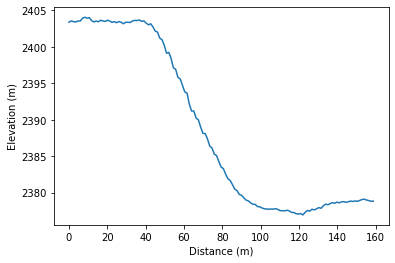

In [87]:
# Parse the data - DO NOT EDIT THIS CELL
data_list = scarp_data.split()
data_array = []
for item in data_list:
    data_array.append(float(item)) # this converts the text to numbers and makes a list of all of the items
npoints = int(len(data_array)/4) # number of points in profile = total number of values / number of columns
data_array = np.array(data_array).reshape((npoints,4))
distance = data_array[:,0]
elevation = data_array[:,3]

import matplotlib.pyplot as plt
plt.figure()
plt.plot(distance,elevation)
plt.ylabel('Elevation (m)')
plt.xlabel('Distance (m)')
plt.show()

## Edit the cell below to add apropriate choices for the maximum x-value for the upper surface and the minimum x-value for the lower surface

In [90]:
# Define the 
xmax_upper = 30.0 # Maximum x-coordinate representing upper surface
xmin_lower = 100.0 # Minimum x-coordinate representing lower surface
measurement_location = 60; # x-position where offset is measured
fault_dip = 70.0  # assumed fault dip in degrees

Upper surface angle -0.560937, Lower surface angle 1.756262 degrees


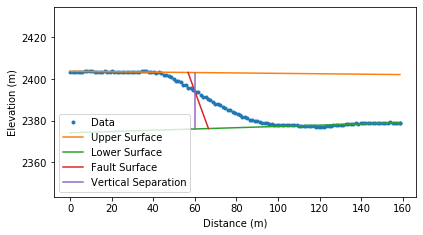

R-squared values: upper surface 0.164995, lower surface 0.696118
Vertical separation is 27.162983 m. Dip component of slip is 28.726872 m


In [108]:
# fit lines to upper and lower surfaces
x_upper = distance[distance <= xmax_upper]
x_lower = distance[distance >= xmin_lower]
z_upper = elevation[distance <= xmax_upper]
z_lower = elevation[distance >= xmin_lower]
# fit trendlines to upper and lower surfaces
from scipy.stats import linregress
m_upper, b_upper, r_upper, p_upper, std_err = linregress(x_upper,z_upper)
m_lower, b_lower, r_lower, p_lower, std_err = linregress(x_lower,z_lower)
upper_angle = np.arctan(m_upper)
lower_angle = np.arctan(m_lower)
delta = fault_dip/180.*np.pi # dip in radians
print("Upper surface angle {:f}, Lower surface angle {:f} degrees".format(upper_angle/np.pi*180.,lower_angle/np.pi*180.))

z_upper_projected = b_upper + distance*m_upper
z_lower_projected = b_lower + distance*m_lower

# This calculates the separation between the upper and lower surfaces
upper_elevation_at_measurement_location = np.interp(measurement_location,distance,z_upper_projected)
lower_elevation_at_measurement_location = np.interp(measurement_location,distance,z_lower_projected)
separation =  upper_elevation_at_measurement_location - lower_elevation_at_measurement_location
vertical_displacement = separation/2*np.sin(np.pi/2+upper_angle)/np.sin(delta-upper_angle) + separation/2*np.sin(np.pi/2+lower_angle)/np.sin(delta-lower_angle)

# This calculates the coordinates where the fault plane intersects the projected upper and lower surfaces
y_measure = np.interp(measurement_location,distance,elevation)
m_fault = np.tan(-delta)
xiu = 1./(m_upper-m_fault) * (y_measure-b_upper-m_fault*measurement_location)
yiu = m_upper*xiu + b_upper
xil = 1./(m_lower-m_fault) * (y_measure-b_lower-m_fault*measurement_location)
yil = m_lower*xil + b_lower
dip_displacement = np.sqrt((xiu-xil)**2+(yiu-yil)**2)

# Plot a figure showing the data together with the upper and lower surfaces
plt.figure(figsize=(6.5,3.5))
plt.plot(distance,elevation,'.',label='Data')
plt.plot(distance,z_upper_projected,label='Upper Surface')
plt.plot(distance,z_lower_projected,label='Lower Surface')
plt.plot([xil,xiu],[yil,yiu],label='Fault Surface')

plt.plot(measurement_location*np.ones(2),[lower_elevation_at_measurement_location,upper_elevation_at_measurement_location],label='Vertical Separation')
plt.axis('equal') # No vertical exaggeration
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.show()

print("R-squared values: upper surface {:f}, lower surface {:f}".format(r_upper**2,r_lower**2))
print("Vertical separation is {:f} m. Dip component of slip is {:f} m".format(separation,dip_displacement))